In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
cl_filters = pd.read_csv("data/clients_filters.csv")
cl_filters = cl_filters[~cl_filters.client.duplicated()]

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [57]:
from gensim.models.word2vec import Word2Vec

cl_vectors = pd.read_csv("data/client_w2v.csv")
cl_vectors = cl_vectors[~cl_vectors.client.duplicated()]
cl_vectors["w2v"] = cl_vectors.w2v_str.apply(lambda x: np.array([float(y) for y in x.split(",")]))

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [58]:
cl = cl_filters.merge(cl_vectors, on="client")

In [62]:
data = np.vstack(cl.w2v.values)
projected_data = cl["filter"].values

In [118]:
a = np.array([0.7, 2.7, 5.92, 13.1, 16, 26.7, 32, 42, 54.6, 72])
b = np.array(list(range(10000, 100001, 10000))).astype(float)

In [119]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(b.reshape(-1, 1), a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [120]:
lr.predict(1.2e6)

array([895.93927273])

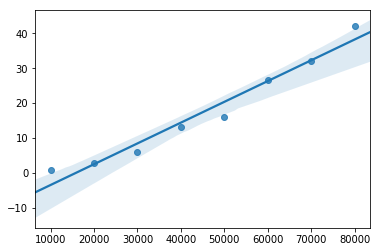

In [111]:
sns.regplot(b, a)

In [ ]:
%%time

num = 200000

import kmapper as km
from sklearn.cluster import DBSCAN

mapper = km.KeplerMapper(verbose=2)
graph = mapper.map(projected_data[:num], data[:num], clusterer=DBSCAN(eps=0.2), nr_cubes=30, overlap_perc=0.1)

Mapping on data shaped (200000, 32) using lens shaped (200000,)

Minimal points in hypercube before clustering: 1
Creating 30 hypercubes.
There are 4 points in cube_0 / 30
Found 0 clusters in cube_0

There are 22 points in cube_1 / 30
Found 1 clusters in cube_1

There are 12 points in cube_2 / 30
Found 0 clusters in cube_2

There are 50 points in cube_3 / 30
Found 1 clusters in cube_3

There are 106 points in cube_4 / 30
Found 3 clusters in cube_4

There are 196 points in cube_5 / 30
Found 6 clusters in cube_5

There are 747 points in cube_6 / 30
Found 5 clusters in cube_6

There are 189 points in cube_7 / 30
Found 7 clusters in cube_7

There are 48 points in cube_8 / 30
Found 1 clusters in cube_8

There are 78 points in cube_9 / 30
Found 3 clusters in cube_9

There are 40 points in cube_10 / 30
Found 3 clusters in cube_10

There are 22 points in cube_11 / 30
Found 1 clusters in cube_11

There are 17 points in cube_12 / 30
Found 1 clusters in cube_12

There are 10 points in cube_13 / 3

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


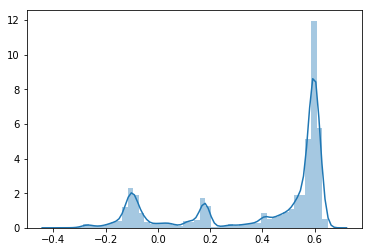

In [78]:
sns.distplot(projected_data)